In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

%matplotlib inline

In [225]:
df = pd.read_csv('C:/Users/spj55/Downloads/Capstone Project/AgriGuide/static/data/Arhar.csv')

In [226]:
df.head()

,Month,Year,Date,Rainfall,WPI
0,4,2012,4/2012,47.5,97.1
1,5,2012,5/2012,31.7,99.7
2,6,2012,6/2012,117.8,101.6
3,7,2012,7/2012,250.2,108.6
4,8,2012,8/2012,262.4,115.6


In [227]:
df=df.drop(['Month','Year','Rainfall'],axis=1)
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\spj55\AppData\Local\Temp\ipykernel_8\2265609996.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [228]:
df.columns = ['ds','y']
df.head()

,ds,y
0,2012-04-01,97.1
1,2012-05-01,99.7
2,2012-06-01,101.6
3,2012-07-01,108.6
4,2012-08-01,115.6


In [229]:
df.tail()

,ds,y
76,2018-08-01,110.8
77,2018-09-01,110.8
78,2018-10-01,109.4
79,2018-11-01,114.0
80,2018-12-01,123.9


In [230]:
df.set_index('ds',inplace=True)


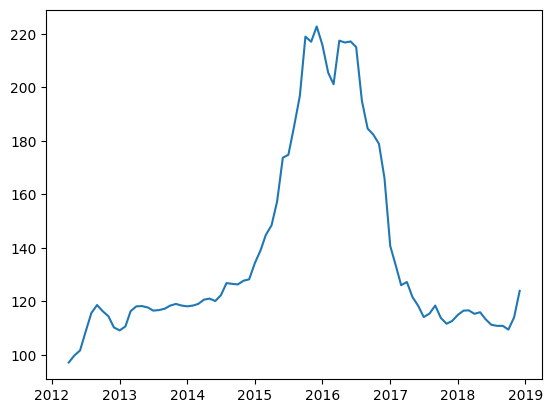

In [231]:
plt.plot(df)

In [232]:
from prophet import Prophet
model=Prophet()
df.reset_index(inplace=True)


In [233]:
model.fit(df)

19:08:44 - cmdstanpy - INFO - Chain [1] start processing


19:08:44 - cmdstanpy - INFO - Chain [1] done processing


In [234]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=400,include_history=True)

In [235]:
future_dates.tail()

,ds
476,2020-01-01
477,2020-01-02
478,2020-01-03
479,2020-01-04
480,2020-01-05


In [236]:
prediction=model.predict(future_dates)

In [237]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-04-01,99.030590,72.780969,123.319296,99.030590,99.030590,-1.703198,-1.703198,-1.703198,-1.703198,-1.703198,-1.703198,0.0,0.0,0.0,97.327392
1,2012-05-01,100.780027,70.258521,119.350413,100.780027,100.780027,-6.343174,-6.343174,-6.343174,-6.343174,-6.343174,-6.343174,0.0,0.0,0.0,94.436853
2,2012-06-01,102.587779,68.236027,119.851345,102.587779,102.587779,-8.350295,-8.350295,-8.350295,-8.350295,-8.350295,-8.350295,0.0,0.0,0.0,94.237485
3,2012-07-01,104.337217,76.466668,126.001490,104.337217,104.337217,-3.869782,-3.869782,-3.869782,-3.869782,-3.869782,-3.869782,0.0,0.0,0.0,100.467435
4,2012-08-01,106.144969,79.036348,126.482073,106.144969,106.144969,-3.373572,-3.373572,-3.373572,-3.373572,-3.373572,-3.373572,0.0,0.0,0.0,102.771397


In [238]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
476,2020-01-01,71.482479,44.252006,94.859583,67.341028,75.726005,-1.846246,-1.846246,-1.846246,-1.846246,-1.846246,-1.846246,0.0,0.0,0.0,69.636233
477,2020-01-02,71.400193,30.836140,82.374717,67.244248,75.654725,-15.223598,-15.223598,-15.223598,-15.223598,-15.223598,-15.223598,0.0,0.0,0.0,56.176595
478,2020-01-03,71.317907,19.169302,69.446006,67.147106,75.583446,-27.439351,-27.439351,-27.439351,-27.439351,-27.439351,-27.439351,0.0,0.0,0.0,43.878556
479,2020-01-04,71.235621,8.908532,59.386709,67.049964,75.520820,-38.147641,-38.147641,-38.147641,-38.147641,-38.147641,-38.147641,0.0,0.0,0.0,33.087980
480,2020-01-05,71.153335,-3.906482,51.460251,66.952822,75.462972,-47.043246,-47.043246,-47.043246,-47.043246,-47.043246,-47.043246,0.0,0.0,0.0,24.110089


c:\Users\spj55\miniconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\spj55\miniconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


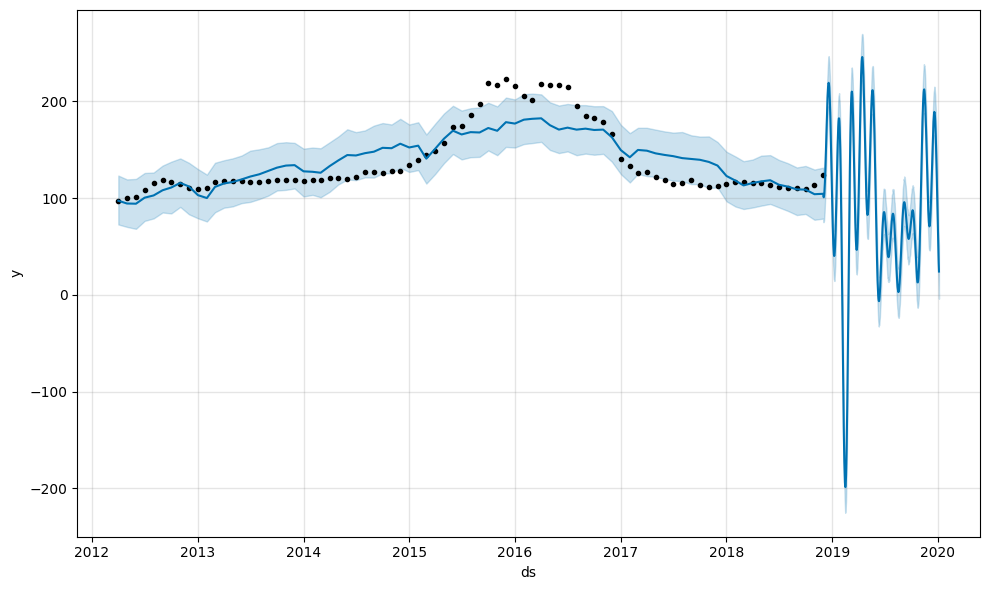

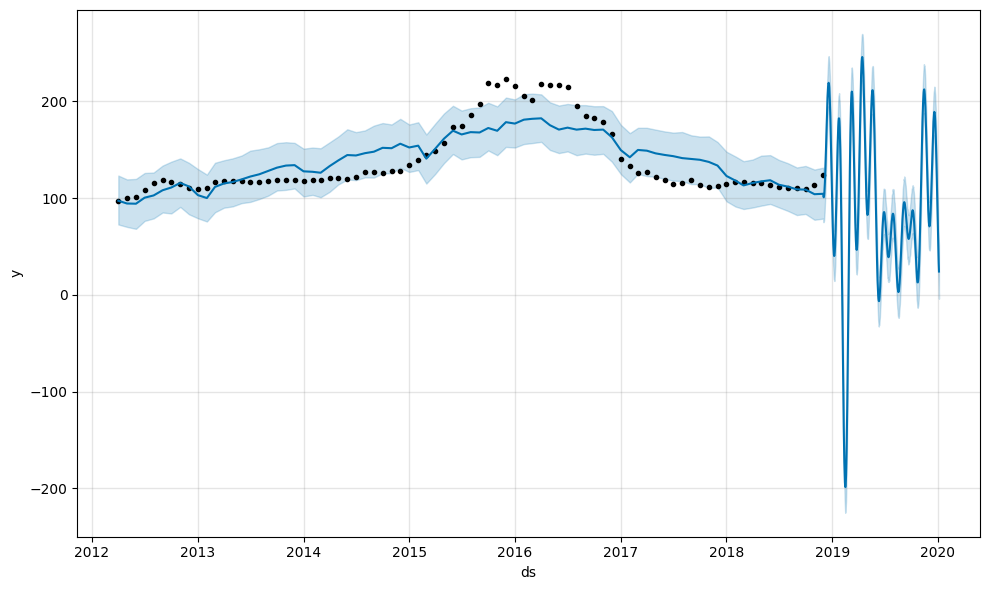

In [239]:
model.plot(prediction) 


c:\Users\spj55\miniconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\spj55\miniconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\spj55\miniconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call 

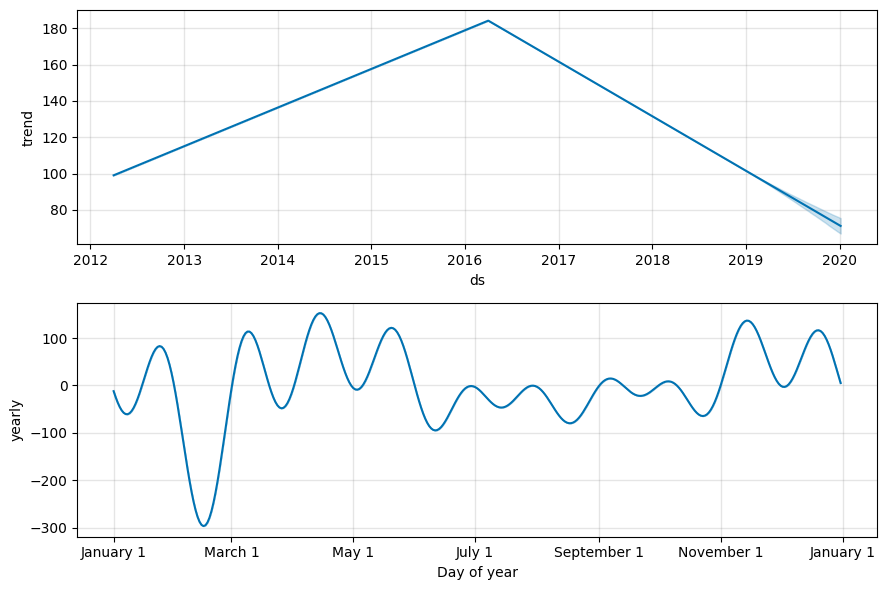

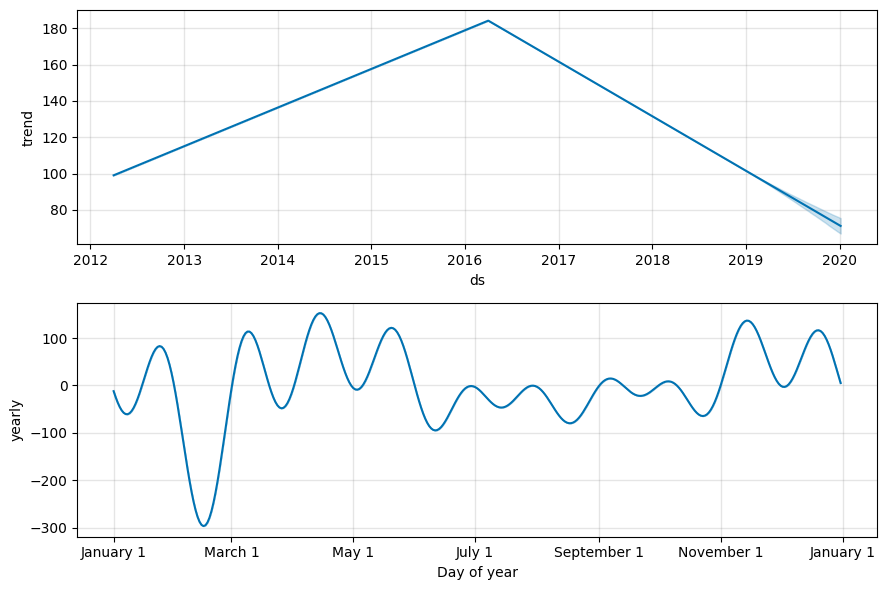

In [240]:
model.plot_components(prediction)

In [241]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

  0%|          | 0/8 [00:00<?, ?it/s]

19:08:47 - cmdstanpy - INFO - Chain [1] start processing
19:08:48 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:05,  1.31it/s]19:08:49 - cmdstanpy - INFO - Chain [1] start processing
19:08:49 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:02<00:07,  1.21s/it]19:08:50 - cmdstanpy - INFO - Chain [1] start processing
19:08:50 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:02<00:04,  1.03it/s]19:08:50 - cmdstanpy - INFO - Chain [1] start processing
19:08:51 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:04<00:04,  1.09s/it]19:08:52 - cmdstanpy - INFO - Chain [1] start processing
19:08:52 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:05<00:03,  1.06s/it]19:08:53 - cmdstanpy - INFO - Chain [1] start processing
19:08:53 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:06<00:01,  1.02it/s]19:08:53 - cmdstanpy - INFO - Chain [1] start proces

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-07-01,123.814927,121.891950,125.618072,122.2,2014-06-20
1,2014-08-01,120.158224,118.359311,121.964015,126.8,2014-06-20
2,2014-09-01,120.287457,118.411602,122.155376,126.5,2014-06-20
3,2014-10-01,123.433497,121.608796,125.357011,126.3,2014-06-20
4,2014-11-01,124.036247,121.945994,126.094042,127.7,2014-06-20


In [242]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
91,2018-08-01,177.678170,133.165317,217.109613,110.8,2017-12-01
92,2018-09-01,176.331733,135.131101,220.476761,110.8,2017-12-01
93,2018-10-01,179.205242,137.055855,219.895769,109.4,2017-12-01
94,2018-11-01,175.608550,131.514539,216.052603,114.0,2017-12-01
95,2018-12-01,177.730824,137.198913,219.734849,123.9,2017-12-01


In [243]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,42 days,1902.172961,43.613908,32.146150,0.240777,0.070107,0.195241,0.111111
1,46 days,1932.626435,43.961647,33.814933,0.252596,0.119583,0.207914,0.000000
2,47 days,1945.732862,44.110462,34.365872,0.253416,0.119583,0.208798,0.000000
3,51 days,2052.538780,45.304953,36.759565,0.263968,0.148030,0.217768,0.000000
4,53 days,2460.757879,49.606027,42.089306,0.292086,0.160980,0.241236,0.000000


c:\Users\spj55\miniconda3\Lib\site-packages\prophet\plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
c:\Users\spj55\miniconda3\Lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


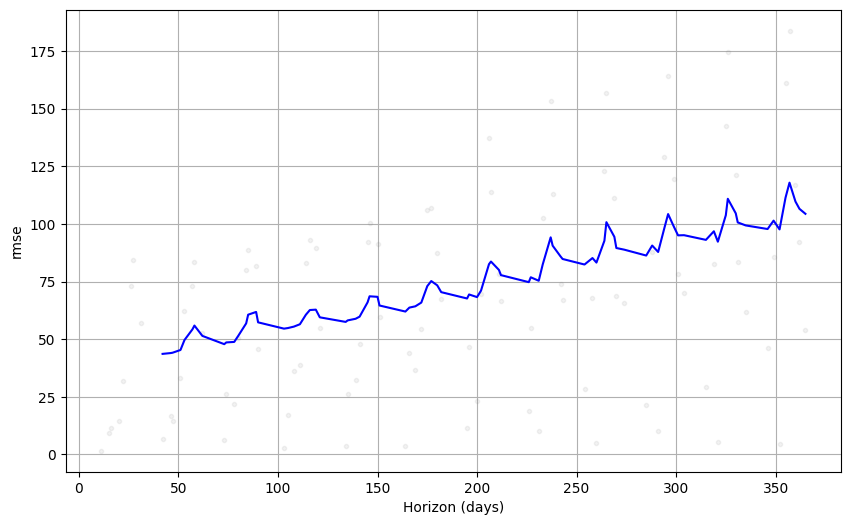

In [244]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [245]:
df2a=prediction.iloc[80:,0]
df2b=prediction.iloc[:,1]

In [246]:
df2=pd.concat([df2a,df2b],axis=1)

In [247]:
df2.tail()

,ds,trend
75,NaT,116.657542
76,NaT,114.106673
77,NaT,111.555805
78,NaT,109.087222
79,NaT,106.536353


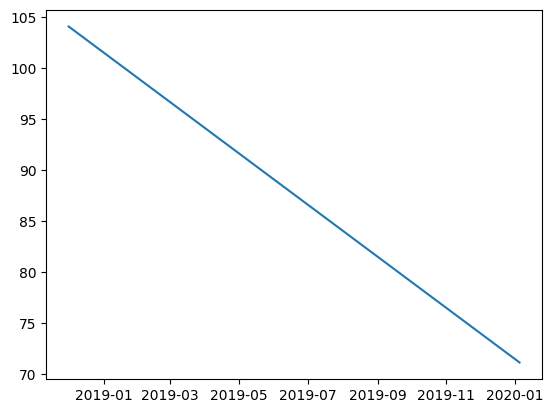

In [248]:
plt.plot(df2['ds'],df2['trend'])